<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/PySpark_EDA_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"


In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/Life_Expectancy_Data.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

**First of all, a Spark session n**eeds to be initialized. With the help of SparkSession, DataFrame can be created and registered as tables. Moreover, SQL tables are executed, tables can be cached, and parquet/JSON/CSV/Avro data formatted files can be read.

Another example of the Session initialization<br/>
sc = SparkSession.builder.appName("PySparkExample")\
    .config ("spark.sql.shuffle.partitions", "50") \
    .config("spark.driver.maxResultSize","5g") \
    .config ("spark.sql.execution.arrow.enabled", "true")\
    .getOrCreate()

In [4]:
spark = SparkSession.builder.appName('life_expectancy').config('config_option', 'value').getOrCreate()

In [5]:
!wget https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/Life_Expectancy_Data.csv


--2021-09-12 01:40:09--  https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/Life_Expectancy_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333442 (326K) [text/plain]
Saving to: ‘Life_Expectancy_Data.csv’

Life_Expectancy_Dat 100%[===================>] 325.63K  --.-KB/s    in 0.04s   

2021-09-12 01:40:10 (7.72 MB/s) - ‘Life_Expectancy_Data.csv’ saved [333442/333442]



In [6]:
!ls -l

total 219524
-rw-r--r--  1 root root    333442 Sep 12 01:40 Life_Expectancy_Data.csv
drwxr-xr-x  1 root root      4096 Sep  1 19:26 sample_data
drwxr-xr-x 13 1000 1000      4096 May 24 05:00 spark-3.1.2-bin-hadoop2.7
-rw-r--r--  1 root root 224445805 May 24 05:01 spark-3.1.2-bin-hadoop2.7.tgz


#Creating a DataFrame <br/>
A DataFrame can be accepted as a distributed and tabulated collection of titled columns which is similar to a table in a relational database. In this post, we will be using DataFrame operations on PySpark API while working with datasets.

In [7]:
df = spark.read.option('inferSchema', True).csv('Life_Expectancy_Data.csv', header=True)
df.show(2)

+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|    Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|            65.0|            263|           62|   

In [ ]:
df.limit(15).toPandas()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,16.2,106,63,9.42,63,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,15.7,110,64,8.33,64,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,15.2,113,63,6.73,63,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,14.7,116,58,7.43,58,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [ ]:
#Let's drop duplicate
df_dropped = df.dropDuplicates()
df_dropped.show(10)

+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|             Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|         Afghanistan|2015|Developing|            65

**Queries:** <br/>
Querying operations can be used for various purposes such as subsetting columns with “select”, adding conditions with “when” and filtering column contents with “like”. Below, some of the most commonly used operations are exemplified. For the complete list of query operations, see the Apache Spark doc.



In [ ]:
df.select("Country").show(10)

+-----------+
|    Country|
+-----------+
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
|Afghanistan|
+-----------+
only showing top 10 rows



# **When Operation**<br/>
In the first example, the “title” column is selected and a condition is added with a “when” condition.

In [ ]:
from pyspark.sql.functions import *
df.select("Country", when(df.Country != "Afghanistan", 1).otherwise(0)).show(10)

+-----------+---------------------------------------------------------+
|    Country|CASE WHEN (NOT (Country = Afghanistan)) THEN 1 ELSE 0 END|
+-----------+---------------------------------------------------------+
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
|Afghanistan|                                                        0|
+-----------+---------------------------------------------------

In the second example, the “isin” operation is applied instead of “when” which can be also used to define some conditions to rows.

In [ ]:
df.groupBy("Country").count().show(10)

+--------------------+-----+
|             Country|count|
+--------------------+-----+
|       Côte d'Ivoire|   16|
|                Chad|   16|
|Micronesia (Feder...|   16|
|            Paraguay|   16|
|               Yemen|   16|
|             Senegal|   16|
|          Cabo Verde|   16|
|              Sweden|   16|
|            Kiribati|   16|
|   Republic of Korea|   16|
+--------------------+-----+
only showing top 10 rows



In [ ]:
#Show distinct values of Country
df.select('Country').distinct().collect()


[Row(Country="Côte d'Ivoire"),
 Row(Country='Chad'),
 Row(Country='Micronesia (Federated States of)'),
 Row(Country='Paraguay'),
 Row(Country='Yemen'),
 Row(Country='Senegal'),
 Row(Country='Cabo Verde'),
 Row(Country='Sweden'),
 Row(Country='Kiribati'),
 Row(Country='Republic of Korea'),
 Row(Country='Guyana'),
 Row(Country='Eritrea'),
 Row(Country='Philippines'),
 Row(Country='Djibouti'),
 Row(Country='Tonga'),
 Row(Country='Malaysia'),
 Row(Country='Singapore'),
 Row(Country='Fiji'),
 Row(Country='Turkey'),
 Row(Country='Malawi'),
 Row(Country='Iraq'),
 Row(Country='Germany'),
 Row(Country='Comoros'),
 Row(Country='Afghanistan'),
 Row(Country='Cambodia'),
 Row(Country='Jordan'),
 Row(Country='Maldives'),
 Row(Country='Rwanda'),
 Row(Country='Sudan'),
 Row(Country='Palau'),
 Row(Country='France'),
 Row(Country='Greece'),
 Row(Country='Sri Lanka'),
 Row(Country='Dominica'),
 Row(Country='Algeria'),
 Row(Country='Equatorial Guinea'),
 Row(Country='Togo'),
 Row(Country='Slovakia'),
 Row

#show rows with specified countries

In [11]:
df[df.Country.isin("Swedan", "Kiribati")].show(3)

+--------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+-----------+----------+---------------------+-------------------+-------------------------------+---------+
| Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|        GDP|Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+--------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+-----------+----------+---------------------+-------------------+-------------------------------+---------+
|Kiribati|2015|Developing|            66.3|            198|            0|   null|       

# **StartsWith and EndsWith**
The startsWith() method lets you check whether the Spark DataFrame column string value starts with a string specified as an argument to this method. This method is case-sensitive. Below example returns, all rows from DataFrame that start with the string

In [10]:
df.filter(col("Country").contains("Kiri")).show()


NameError: ignored

In [ ]:
df.select("Country", "Status", df.Country.startswith("Kiri")).show(3)

In [ ]:
df.filter(df.Country.startswith('Kiri')).show()

In [ ]:
df.select("Country", "Status", df.Country.endswith("ti")).show(5)

# **SubString**

In [ ]:
df.select(df.Country.substr(1,5).alias("country")).show()

+-------+
|country|
+-------+
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Afgha|
|  Alban|
|  Alban|
|  Alban|
|  Alban|
+-------+
only showing top 20 rows



# Describe

In [ ]:
df.describe().show()

+-------+-----------+------------------+----------+-----------------+------------------+------------------+------------------+----------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+---------------------+-------------------+-------------------------------+------------------+
|summary|    Country|              Year|    Status| Life expectancy |   Adult Mortality|     infant deaths|           Alcohol|percentage expenditure|       Hepatitis B|          Measles |              BMI |under-five deaths |             Polio| Total expenditure|      Diphtheria |          HIV/AIDS|               GDP|          Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|         Schooling|
+-------+-----------+------------------+----------+-----------------+------------------+------------------+------------------+------

In [ ]:
df.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
df.count()

2938

In [ ]:
df.distinct().count()

2938

# **ADD, UPDATE & REMOVE COLUMNS**

In [ ]:
df = df.withColumn("country", lit("This is the new country "))
df.select("country").show(3)

+--------------------+
|             country|
+--------------------+
|This is the new c...|
|This is the new c...|
|This is the new c...|
+--------------------+
only showing top 3 rows



In [ ]:
#Change the column name
df = df.withColumnRenamed("Country", "country_name")
df.show(3)

+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|        country_name|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|This is the new c...|2015|Developing|            65

In [ ]:
#Drop one column
df_remove = df.drop("country_name", "Status").show(5)
df_remove

+----+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|Year|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+----+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|2015|            65.0|            263|           62|   0.01|           71.27962362|         65|    1154| 19.1|                83|    6|            

# **GroupBy**

In [ ]:
df.groupBy("Year").count().show(4)

+----+-----+
|Year|count|
+----+-----+
|2003|  183|
|2007|  183|
|2015|  183|
|2006|  183|
+----+-----+
only showing top 4 rows



# **Missing And Replacing Values**

In [ ]:
df.na.fill(50).show(5)

+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|        country_name|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+--------------------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|This is the new c...|2015|Developing|            65

# **RUNNING SQL QUERIES PROGRAMMATICALLY**

In [12]:
df.createGlobalTempView("sql_country")

In [13]:
df.registerTempTable("df")

In [14]:
spark.sql("select * from df").show(3)

+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|    Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|       GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+----------+-----------+---------------------+-------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|            65.0|            263|           62|   

#OrderBy <br/>
The keyword ORDER BY specifies which field the results of the query will be ordered by. By default, the query returns results from A to Z, lowest to highest, and earliest to latest. This is called “Ascending Order.” In order to reverse this ordering, add the keyword DESC following the column name.

In [19]:
spark.sql("SELECT Country, Year, Status\
           FROM df \
           WHERE Status LIKE '%Developed%' \
           ORDER BY year DESC").show(20)

+-----------+----+---------+
|    Country|Year|   Status|
+-----------+----+---------+
|    Denmark|2015|Developed|
|      Malta|2015|Developed|
|    Austria|2015|Developed|
|    Belgium|2015|Developed|
|  Australia|2015|Developed|
|    Croatia|2015|Developed|
|     Cyprus|2015|Developed|
|    Czechia|2015|Developed|
|   Bulgaria|2015|Developed|
|    Germany|2015|Developed|
|    Hungary|2015|Developed|
|    Iceland|2015|Developed|
|    Ireland|2015|Developed|
|      Italy|2015|Developed|
|      Japan|2015|Developed|
|     Latvia|2015|Developed|
|  Lithuania|2015|Developed|
| Luxembourg|2015|Developed|
|Netherlands|2015|Developed|
|New Zealand|2015|Developed|
+-----------+----+---------+
only showing top 20 rows



In [20]:
spark.sql("SELECT Country, Year, Status\
           FROM df \
           WHERE Status = 'Developed' \
           ORDER BY year DESC").show(20)

+-----------+----+---------+
|    Country|Year|   Status|
+-----------+----+---------+
|    Denmark|2015|Developed|
|      Malta|2015|Developed|
|    Austria|2015|Developed|
|    Belgium|2015|Developed|
|  Australia|2015|Developed|
|    Croatia|2015|Developed|
|     Cyprus|2015|Developed|
|    Czechia|2015|Developed|
|   Bulgaria|2015|Developed|
|    Germany|2015|Developed|
|    Hungary|2015|Developed|
|    Iceland|2015|Developed|
|    Ireland|2015|Developed|
|      Italy|2015|Developed|
|      Japan|2015|Developed|
|     Latvia|2015|Developed|
|  Lithuania|2015|Developed|
| Luxembourg|2015|Developed|
|Netherlands|2015|Developed|
|New Zealand|2015|Developed|
+-----------+----+---------+
only showing top 20 rows



In [23]:
spark.sql("SELECT Country, Year, Status\
           FROM df \
           WHERE Year = 2014 \
           ORDER BY year DESC").show(20)

+--------------------+----+----------+
|             Country|Year|    Status|
+--------------------+----+----------+
|         Afghanistan|2014|Developing|
|             Albania|2014|Developing|
|             Algeria|2014|Developing|
|              Angola|2014|Developing|
| Antigua and Barbuda|2014|Developing|
|           Argentina|2014|Developing|
|             Armenia|2014|Developing|
|           Australia|2014| Developed|
|             Austria|2014| Developed|
|          Azerbaijan|2014|Developing|
|             Bahamas|2014|Developing|
|             Bahrain|2014|Developing|
|          Bangladesh|2014|Developing|
|            Barbados|2014|Developing|
|             Belarus|2014|Developing|
|             Belgium|2014| Developed|
|              Belize|2014|Developing|
|               Benin|2014|Developing|
|              Bhutan|2014|Developing|
|Bolivia (Plurinat...|2014|Developing|
+--------------------+----+----------+
only showing top 20 rows



# **Derived Columns**
Derived columns are new columns the results of which come from a manipulation of the existing columns in the database.

The following code snippet demonstrates how it is possible to create new columns from the contents of other columns. In this case, the new column is named ‘sat_total’ using the AS keyword.

In [27]:
spark.sql("SELECT Country, Year, Status,\
           Country + Year AS country_year \
           FROM df \
           WHERE Year = 2014 \
           ORDER BY year DESC").show(20)

+--------------------+----+----------+------------+
|             Country|Year|    Status|country_year|
+--------------------+----+----------+------------+
|         Afghanistan|2014|Developing|        null|
|             Albania|2014|Developing|        null|
|             Algeria|2014|Developing|        null|
|              Angola|2014|Developing|        null|
| Antigua and Barbuda|2014|Developing|        null|
|           Argentina|2014|Developing|        null|
|             Armenia|2014|Developing|        null|
|           Australia|2014| Developed|        null|
|             Austria|2014| Developed|        null|
|          Azerbaijan|2014|Developing|        null|
|             Bahamas|2014|Developing|        null|
|             Bahrain|2014|Developing|        null|
|          Bangladesh|2014|Developing|        null|
|            Barbados|2014|Developing|        null|
|             Belarus|2014|Developing|        null|
|             Belgium|2014| Developed|        null|
|           

# **LIKE**<br/>
LIKE is a keyword used with the WHERE keyword. It enables more flexible searching. The following example returns rows with the word “Life” in the song_name, where “Life” can be followed by any number of characters. This is useful whenever you have lots of similar but slightly different values in a given column.

LIKE requires the use of wildcards. ‘%’ is a wild card that represents a character or any number of characters.

In [29]:
spark.sql("SELECT Country, Year, Status\
           FROM df \
           WHERE Country LIKE 'Bhutan%'\
           ORDER BY year DESC").show(20)

+-------+----+----------+
|Country|Year|    Status|
+-------+----+----------+
| Bhutan|2015|Developing|
| Bhutan|2014|Developing|
| Bhutan|2013|Developing|
| Bhutan|2012|Developing|
| Bhutan|2011|Developing|
| Bhutan|2010|Developing|
| Bhutan|2009|Developing|
| Bhutan|2008|Developing|
| Bhutan|2007|Developing|
| Bhutan|2006|Developing|
| Bhutan|2005|Developing|
| Bhutan|2004|Developing|
| Bhutan|2003|Developing|
| Bhutan|2002|Developing|
| Bhutan|2001|Developing|
| Bhutan|2000|Developing|
+-------+----+----------+



# **IN**
IN is a keyword that, similar to LIKE, is used in combination with WHERE. The purpose of IN is to allow you to filter data based on several possible values. 
Any non-numeric data must be placed in single-quotes, as shown, as with comparison operators. Place a comma in between each pair of distinct values.

In [31]:
spark.sql("SELECT Country, Year, Status\
           FROM df \
           WHERE Country IN ('India','Bhutan')\
           ORDER BY year DESC").show(20)

+-------+----+----------+
|Country|Year|    Status|
+-------+----+----------+
| Bhutan|2015|Developing|
|  India|2015|Developing|
| Bhutan|2014|Developing|
|  India|2014|Developing|
| Bhutan|2013|Developing|
|  India|2013|Developing|
| Bhutan|2012|Developing|
|  India|2012|Developing|
| Bhutan|2011|Developing|
|  India|2011|Developing|
|  India|2010|Developing|
| Bhutan|2010|Developing|
| Bhutan|2009|Developing|
|  India|2009|Developing|
| Bhutan|2008|Developing|
|  India|2008|Developing|
|  India|2007|Developing|
| Bhutan|2007|Developing|
| Bhutan|2006|Developing|
|  India|2006|Developing|
+-------+----+----------+
only showing top 20 rows



**NOT** <br/>
NOT provides the inverse results for IN, LIKE, and similar operators.

In [33]:
spark.sql("SELECT Country, Year, Status\
           FROM df \
           WHERE Status NOT LIKE 'Developin%'").show(20)

+---------+----+---------+
|  Country|Year|   Status|
+---------+----+---------+
|Australia|2015|Developed|
|Australia|2014|Developed|
|Australia|2013|Developed|
|Australia|2012|Developed|
|Australia|2011|Developed|
|Australia|2010|Developed|
|Australia|2009|Developed|
|Australia|2008|Developed|
|Australia|2007|Developed|
|Australia|2006|Developed|
|Australia|2005|Developed|
|Australia|2004|Developed|
|Australia|2003|Developed|
|Australia|2002|Developed|
|Australia|2001|Developed|
|Australia|2000|Developed|
|  Austria|2015|Developed|
|  Austria|2014|Developed|
|  Austria|2013|Developed|
|  Austria|2012|Developed|
+---------+----+---------+
only showing top 20 rows



# **AND & BETWEEN <br/>**
The following example filters for populations less than 500,000 and greater than 450,000. The AND operator allows you to run two complete logical statements; the word ‘population_estimate_2012’ could not be omitted from the second half of the WHERE clause shown belowAND & BETWEEN
The following example filters for populations less than 500,000 and greater than 450,000. The AND operator allows you to run two complete logical statements; the word ‘population_estimate_2012’ could not be omitted from the second half of the WHERE clause shown below

In [40]:
#DiphtheriaDiphtheria
spark.sql("SELECT Country, Year, Status \
           FROM df \
           WHERE Year BETWEEN 2014 AND 2015").show(20)

+-------------------+----+----------+
|            Country|Year|    Status|
+-------------------+----+----------+
|        Afghanistan|2015|Developing|
|        Afghanistan|2014|Developing|
|            Albania|2015|Developing|
|            Albania|2014|Developing|
|            Algeria|2015|Developing|
|            Algeria|2014|Developing|
|             Angola|2015|Developing|
|             Angola|2014|Developing|
|Antigua and Barbuda|2015|Developing|
|Antigua and Barbuda|2014|Developing|
|          Argentina|2015|Developing|
|          Argentina|2014|Developing|
|            Armenia|2015|Developing|
|            Armenia|2014|Developing|
|          Australia|2015| Developed|
|          Australia|2014| Developed|
|            Austria|2015| Developed|
|            Austria|2014| Developed|
|         Azerbaijan|2015|Developing|
|         Azerbaijan|2014|Developing|
+-------------------+----+----------+
only showing top 20 rows



# **HAVING** <br/>
HAVING is used in conjunction with GROUP BY to filter group rows that do not satisfy a certain condition.

HAVING is analogous to WHERE, except it is used with GROUP BY. * The HAVING clause sets the condition for groups of rows created by the GROUP BY clause after the GROUP BY clause applies. * The WHERE clause sets the condition for individual rows before the GROUP BY clause applies.

In [46]:
spark.sql("SELECT Year\
           FROM df \
           WHERE Status NOT LIKE 'Developin%'\
           GROUP BY Year \
           HAVING Year='2015'").show(20)

+----+
|Year|
+----+
|2015|
+----+



In [15]:
spark.sql("SELECT * FROM df  WHERE Year=2015;").groupBy("Adult Mortality").count().show(3)

+---------------+-----+
|Adult Mortality|count|
+---------------+-----+
|            148|    1|
|            137|    1|
|             85|    1|
+---------------+-----+
only showing top 3 rows



Like keyword usage

In [ ]:
df.select()

In [ ]:
df2 = df.select('Country', 'Year', 'Alcohol', 'GDP', 'Population')
df2.show(3)

+-----------+----+-------+----------+-----------+
|    Country|Year|Alcohol|       GDP| Population|
+-----------+----+-------+----------+-----------+
|Afghanistan|2015|   0.01| 584.25921|3.3736494E7|
|Afghanistan|2014|   0.01|612.696514|   327582.0|
|Afghanistan|2013|   0.01|631.744976|3.1731688E7|
+-----------+----+-------+----------+-----------+
only showing top 3 rows



In [ ]:
def histogram(df, col, bins=10, xname=None, yname=None):
    
    '''
    This function makes a histogram from spark dataframe named 
    df for column name col. 
    '''
    
    # Calculating histogram in Spark 
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)
    
    # Preprocessing histogram points and locations 
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]
    
    # Making a bar plot 
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(col)
    plt.ylabel(yname)
    plt.show()


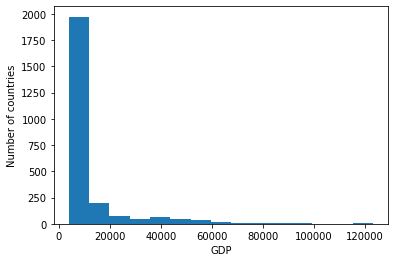

In [ ]:

# Plotting the GDP histogram 
# There are a lots of lots of very very poor country. 
# The world is skewwwwwwwd!

histogram(df, 'GDP', bins=15, yname='Number of countries')

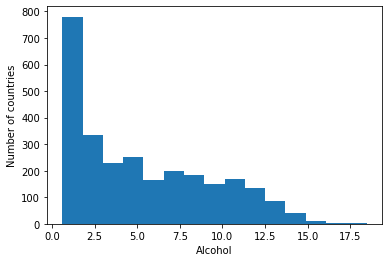

In [ ]:
histogram(df2, 'Alcohol', bins=15, yname='Number of countries')

In [ ]:

df.select('Population').summary().show()

+-------+--------------------+
|summary|          Population|
+-------+--------------------+
|  count|                2286|
|   mean|1.2753375120052498E7|
| stddev| 6.101209650842794E7|
|    min|                34.0|
|    25%|            195553.0|
|    50%|           1384969.0|
|    75%|           7423289.0|
|    max|       1.293859294E9|
+-------+--------------------+



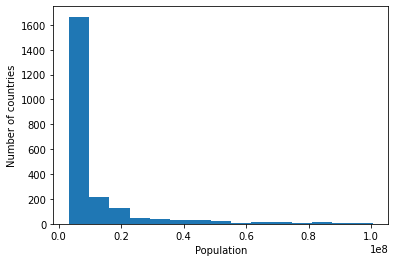

In [ ]:
histogram(df.filter(df['Population']<100000000), \
          'Population', bins=15, yname='Number of countries')

In [ ]:
def lineplot(df, x, y, measure='mean'):
    
    '''
    This function makes a line plot from Spark dataframe df with 
    independent variable x and averaged over y.
    '''
    
    if measure == 'mean':
        
        # Grouping the dataframe by x and averaging over y
        # Sorting is important because Spark shuffle the values 
        # when doing the calculation
        
        pd_df = df.groupBy(x).mean(y).toPandas().sort_values(by=x)
        
        # Making plot using pandas 
        pd_df.plot(x, 'avg({})'.format(y), legend=False)
        
    elif measure == 'total':
        pd_df = df.groupBy(x).sum(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'sum({})'.format(y), legend=False)
        
    elif measure == 'count':
        pd_df = df.groupBy(x).count().toPandas().sort_values(by=x)
        pd_df.plot(x, 'count', legend=False)
    
    plt.ylabel(y)
    plt.show()

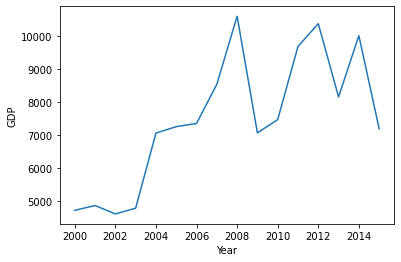

In [ ]:
lineplot(df, 'Year', 'GDP', measure='mean')

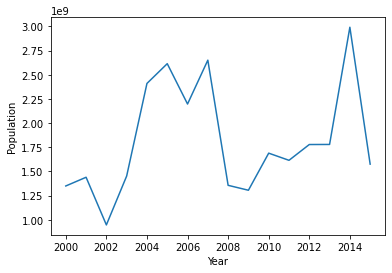

In [ ]:
lineplot(df, 'Year', 'Population', measure='total')

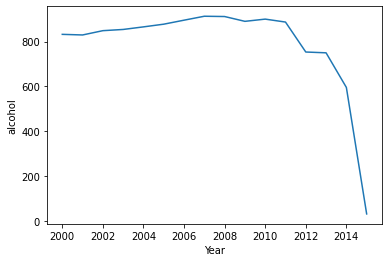

In [ ]:

# The world has become no alcoholic all of sudden??!

lineplot(df, 'Year', 'alcohol', measure='total')

In [ ]:
def barplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a bar plot for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

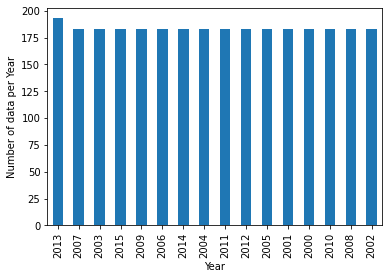

In [ ]:
# Everybody is participating every year (almost)

barplot(df, 'Year', lim=20, yname='Number of data per Year')

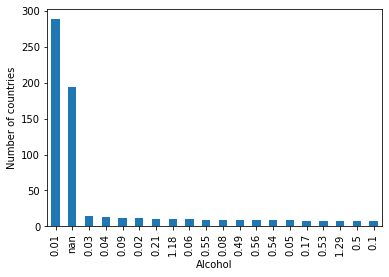

In [ ]:

# Most of the world population consumes very little alcohol. 

barplot(df, 'Alcohol', lim=20, yname='Number of countries')

In [ ]:
def pieplot(df, col, lim=10, yname=None):
    
    '''
    This function makes a pie chart for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()

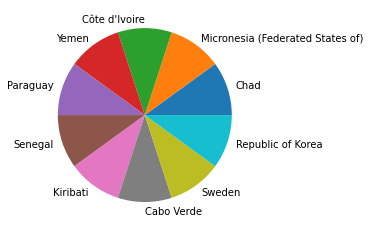

In [ ]:
pieplot(df, 'Country')

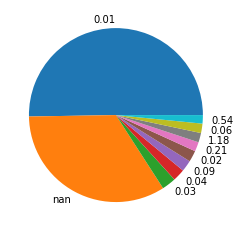

In [ ]:
pieplot(df, 'Alcohol')

In [ ]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [ ]:

def boxplot(df, col, group_by, samp_size=10000): 
    
    '''
    This function makes a box plot for a Spark dataframe df 
    grouping them by a column name called group_by and their
    aggrigate on another column called col. 
    '''
    
    # Selecting sample for the large dataset 
    # For samll data sampling is not done. For the large data 
    # sample size is the specified number. 
    
    true_samp_size = min(samp_size/df.count(), 1.0)
    pd_df = df.sample(False, true_samp_size).toPandas()
    
    # Making plot 
    pd_df.boxplot(col, by=group_by, figsize=(8, 5))
    plt.ylabel(col)
#     plt.xticks([2000, 2005, 2010, 2015])
    plt.title(None)
    plt.show()

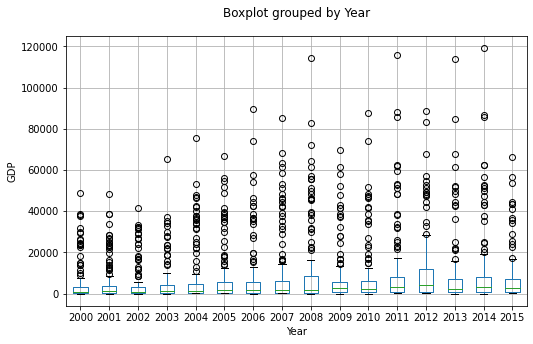

In [ ]:

boxplot(df, 'GDP', 'Year')

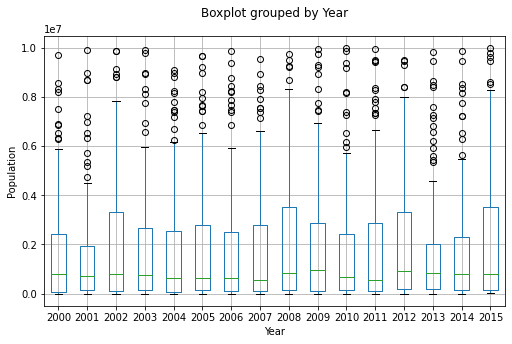

In [ ]:
boxplot(df.filter(df['Population']<10000000), 'Population', 'Year')